# How to use `RandomTree.jl`

## Load the packages

In [ ]:
using RandomTree

In [ ]:
using BenchmarkTools # For testing the speed

In [ ]:
using Statistics

In [ ]:
using Plots

In [ ]:
using StatsBase

## Genrate random trees

We generate a Catalan trees of size 5. 

In [21]:
tree = CatalanTree(5)
degseq = degrees(tree)
println(degseq)

[2, 1, 1, 0, 0]


This tree is represented by its degree sequnce in depth-first-search order. It's corresponding to the following tree

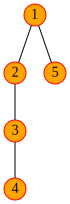

In [22]:
drawtree(degseq, true)

The algorithm for generting the degree sequneces is very fast. For example, for trees of size $10^6$, it take about 30ms

In [23]:
tree = CatalanTree(10^6)

@benchmark degrees(tree)

BenchmarkTools.Trial: 
  memory estimate:  15.26 MiB
  allocs estimate:  41
  --------------
  minimum time:     16.366 ms (0.00% GC)
  median time:      23.469 ms (5.68% GC)
  mean time:        26.456 ms (5.35% GC)
  maximum time:     118.000 ms (70.15% GC)
  --------------
  samples:          189
  evals/sample:     1

In [27]:
tree = CatalanTree(500000)
@benchmark degrees(tree)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  12
  --------------
  minimum time:     7.121 ms (0.00% GC)
  median time:      12.268 ms (0.00% GC)
  mean time:        14.277 ms (5.14% GC)
  maximum time:     99.832 ms (82.67% GC)
  --------------
  samples:          350
  evals/sample:     1

For Cayley tree and Binary tree (0 or 2 children), it's even faster

In [28]:
tree = CayleyTree(10^6)
@btime degrees(tree);

  11.378 ms (5 allocations: 7.65 MiB)


In [ ]:
tree = BinaryTree(10^6)
@btime degrees(tree);

## Simulations on trees

Several types of simulation on random trees are provided. For example, it is know that the number of leaves in a Cayley tree of size $n$ has expectation $n e^{-1}$ and has a normal limit distribution. Let's see if it's true by generate 2000 samples.

In [ ]:
treesize=10^5
tree = CayleyTree(treesize)
sim = LeafSimulator(tree)

In [ ]:
samples = simulation(sim, 2000);

The mean is about

In [ ]:
mu = mean(samples)

Comparing with theoretical expectaion.

In [ ]:
mu/(treesize*exp(-1))

If we shift the samples by its mean and rescale by square root of the variance and draw a histogram, it does look a bit like a normal distribution.

In [ ]:
sigma = std(samples)
samples_rescaled = @. (samples-mu)/sigma;
histogram(samples_rescaled)

The moments also suggest a normal distribution.

In [ ]:
print([round(moment(samples_rescaled, r), digits=3) for r in 1:4])

## Drawing trees

To draw trees, you must have the graph drawing software [Graphviz](http://www.graphviz.org/) and this [Python package](https://github.com/xflr6/graphviz) installed.

If you want draw a tree from a degree sequence

In [ ]:
drawtree([1, 1, 2, 0, 0], true)

Conditional Galton-Watson trees are considered tall and skinny. Let's see it with our eyes.

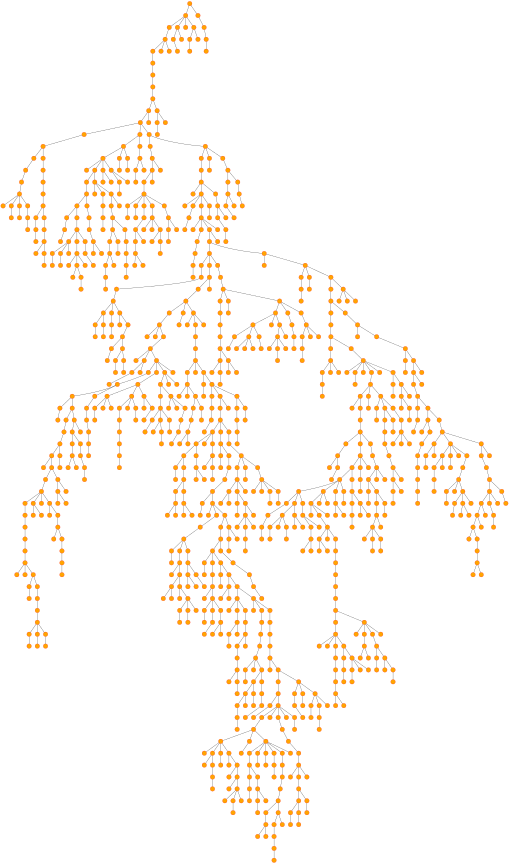

In [29]:
tree = CayleyTree(1000)
drawtree(tree)

But random recursive trees are much shorter

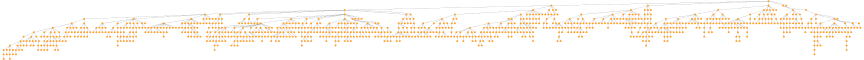

In [30]:
tree = RandomRecursiveTree(1000)
drawtree(tree)